# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name |variable prefix|columns |DType |Description | 
| :--- | :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_|25 |Binary|Records attendence for each week of treatment | 
| Demographics|dem_|10 |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|225|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|6|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|18|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|12|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|70|Numeric |Surveys for self reported drug use, collected every 4 weeks, records total number of instances of drug use for the previous 30 days|
| Dose Record |meds_|50|Numeric |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [2]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/clean_38_features.csv')

# Display the first few rows of the data
data

,Oxycodone Test - Assessment,Cocaine Test - Assessment,Methamphetamine Test - Assessment,Opiate 300 Test - Assessment,Oxycodone Test - Week 1,Cocaine Test - Week 1,Methamphetamine Test - Week 1,Opiate 300 Test - Week 1,Oxycodone Test - Week 2,Cocaine Test - Week 2,...,Medication,COWS - Pre-Dose Exam,COWS - Post-Dose Exam,Risk Behavior Survey - Sexual Activity,Risk Behavior Survey - Cocaine Use,Risk Behavior Survey - Heroine Use,Risk Behavior Survey - Methamphetamine Use,Risk Behavior Survey - Other Opiate Use,Gender,Dropout
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11,6,1.0,0.0,30.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,8,1,1.0,0.0,30.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,8,5,1.0,23.0,30.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,11,9,1.0,2.0,30.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,11,6,1.0,0.0,4.0,0.0,26.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,11,8,1.0,2.0,30.0,0.0,0.0,0.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,26,10,1.0,13.0,30.0,0.0,4.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,14,6,1.0,0.0,30.0,0.0,0.0,0.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,12,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
data.columns.tolist()

['Oxycodone Test - Assessment',
 'Cocaine Test - Assessment',
 'Methamphetamine Test - Assessment',
 'Opiate 300 Test - Assessment',
 'Oxycodone Test - Week 1',
 'Cocaine Test - Week 1',
 'Methamphetamine Test - Week 1',
 'Opiate 300 Test - Week 1',
 'Oxycodone Test - Week 2',
 'Cocaine Test - Week 2',
 'Methamphetamine Test - Week 2',
 'Opiate 300 Test - Week 2',
 'Oxycodone Test - Week 3',
 'Cocaine Test - Week 3',
 'Methamphetamine Test - Week 3',
 'Opiate 300 Test - Week 3',
 'Oxycodone Test - Week 4',
 'Cocaine Test - Week 4',
 'Methamphetamine Test - Week 4',
 'Opiate 300 Test - Week 4',
 'Cocaine Survey - Assessment',
 'Oxycodone Survey - Assessment',
 'Methamphetamine Survey - Assessment',
 'Opiates Survey - Assessment',
 'Cocaine Survey - Week 4',
 'Oxycodone Survey - Week 4',
 'Methamphetamine Survey - Week 4',
 'Opiates Survey - Week 4',
 'Medication',
 'COWS - Pre-Dose Exam',
 'COWS - Post-Dose Exam',
 'Risk Behavior Survey - Sexual Activity',
 'Risk Behavior Survey - Cocai

In [5]:
tests = data[[col for col in data.columns if 'Test' in col]]

tests

,Oxycodone Test - Assessment,Cocaine Test - Assessment,Methamphetamine Test - Assessment,Opiate 300 Test - Assessment,Oxycodone Test - Week 1,Cocaine Test - Week 1,Methamphetamine Test - Week 1,Opiate 300 Test - Week 1,Oxycodone Test - Week 2,Cocaine Test - Week 2,Methamphetamine Test - Week 2,Opiate 300 Test - Week 2,Oxycodone Test - Week 3,Cocaine Test - Week 3,Methamphetamine Test - Week 3,Opiate 300 Test - Week 3,Oxycodone Test - Week 4,Cocaine Test - Week 4,Methamphetamine Test - Week 4,Opiate 300 Test - Week 4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


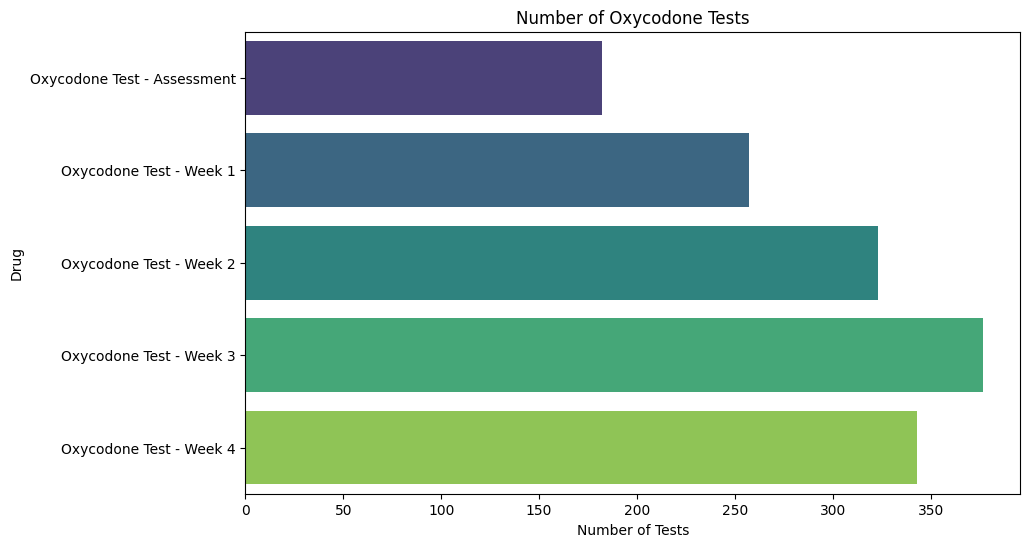

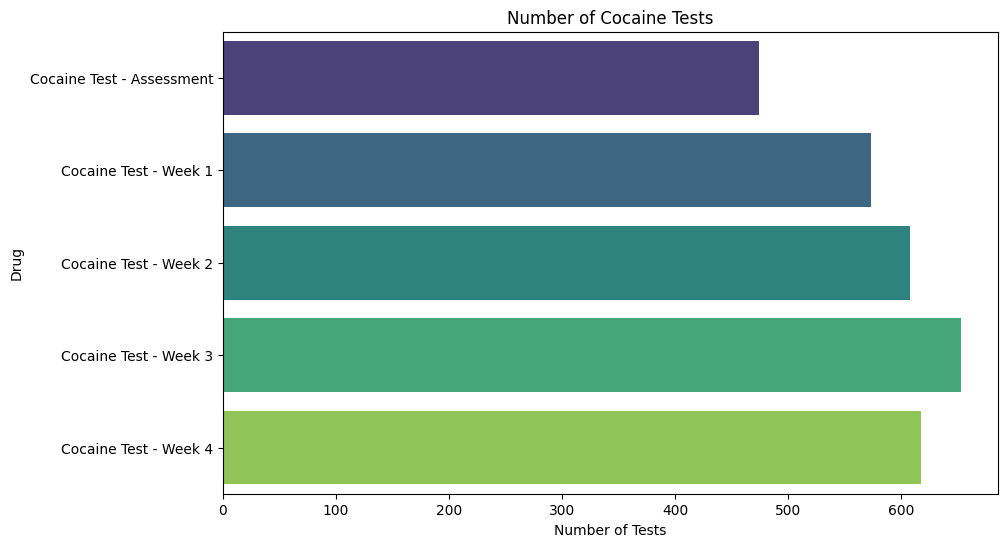

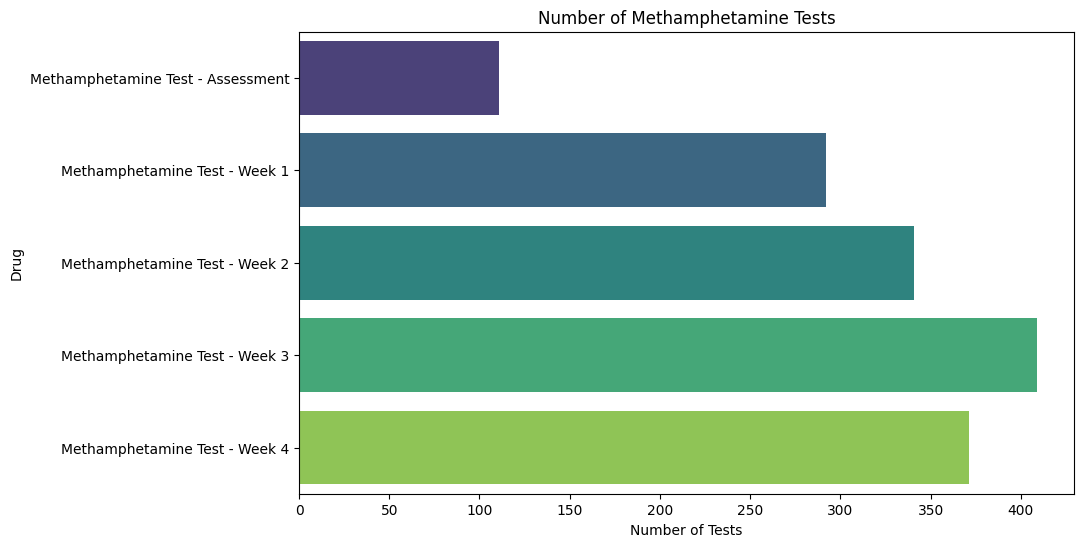

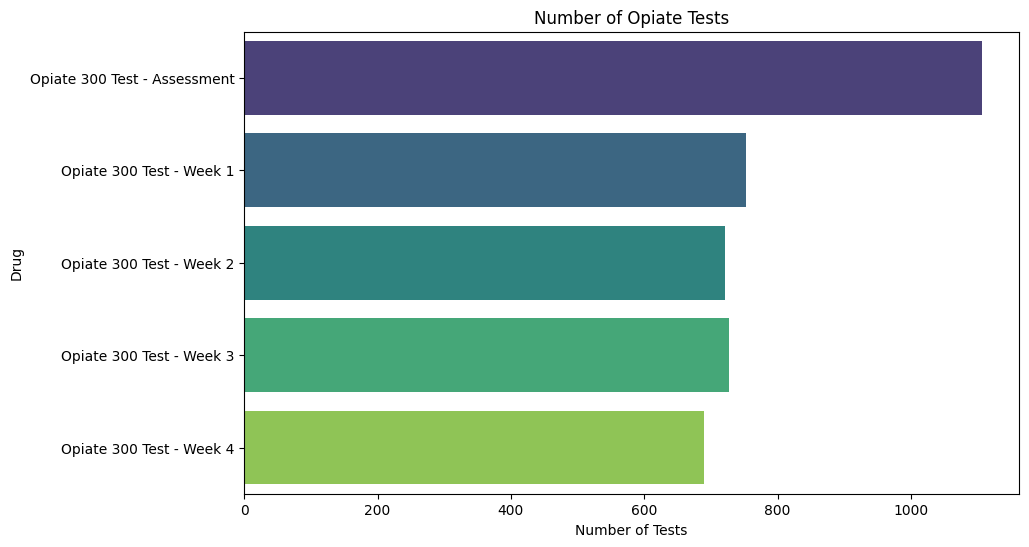

In [21]:
# create list for plotting
tests_list = ['Oxycodone','Cocaine','Methamphetamine','Opiate']


# create a df and separate barplot for each drug above
for test in tests_list:
    test_df = tests[[col for col in tests.columns if test in col]]
    test_df = test_df.sum()
    plt.figure(figsize=(10,6))
    sns.barplot(x=test_df.values, y=test_df.index, palette='viridis')
    plt.title(f'Number of {test} Tests')
    plt.xlabel('Number of Tests')
    plt.ylabel('Drug')
    plt.show()



,Cocaine Survey - Assessment,Oxycodone Survey - Assessment,Methamphetamine Survey - Assessment,Opiates Survey - Assessment,Cocaine Survey - Week 4,Oxycodone Survey - Week 4,Methamphetamine Survey - Week 4,Opiates Survey - Week 4,Risk Behavior Survey - Sexual Activity,Risk Behavior Survey - Cocaine Use,Risk Behavior Survey - Heroine Use,Risk Behavior Survey - Methamphetamine Use,Risk Behavior Survey - Other Opiate Use
0,0.0,0.0,0.0,30.0,0.0,0.0,2.0,0.0,1.0,0.0,30.0,0.0,0.0
1,0.0,0.0,0.0,30.0,0.0,0.0,0.0,5.0,1.0,0.0,30.0,0.0,0.0
2,23.0,0.0,0.0,30.0,9.0,0.0,0.0,9.0,1.0,23.0,30.0,0.0,0.0
3,2.0,1.0,0.0,30.0,1.0,0.0,0.0,6.0,1.0,2.0,30.0,0.0,1.0
4,0.0,25.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,2.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,1.0,2.0,30.0,0.0,0.0
1265,11.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,1.0,13.0,30.0,0.0,4.0
1266,0.0,8.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0
1267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


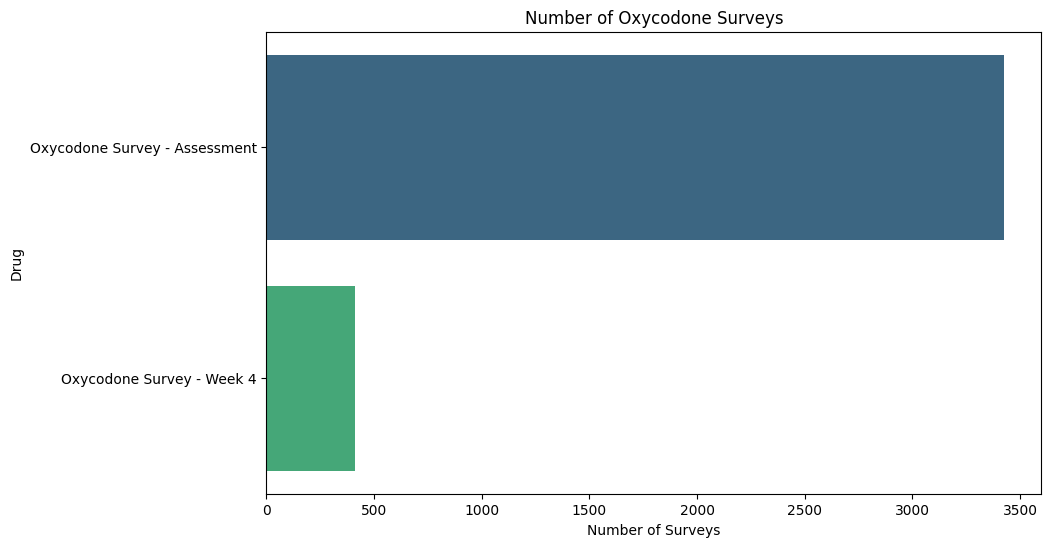

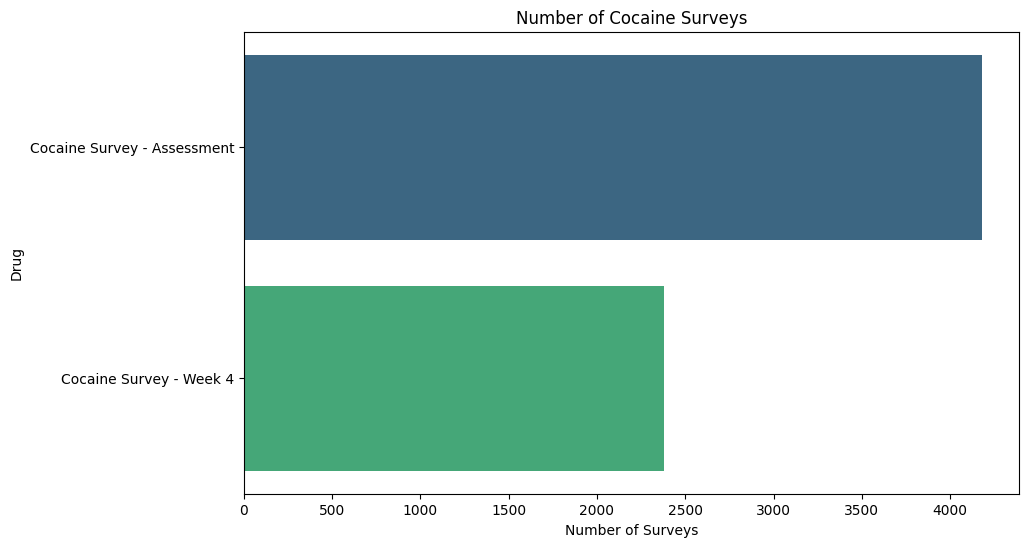

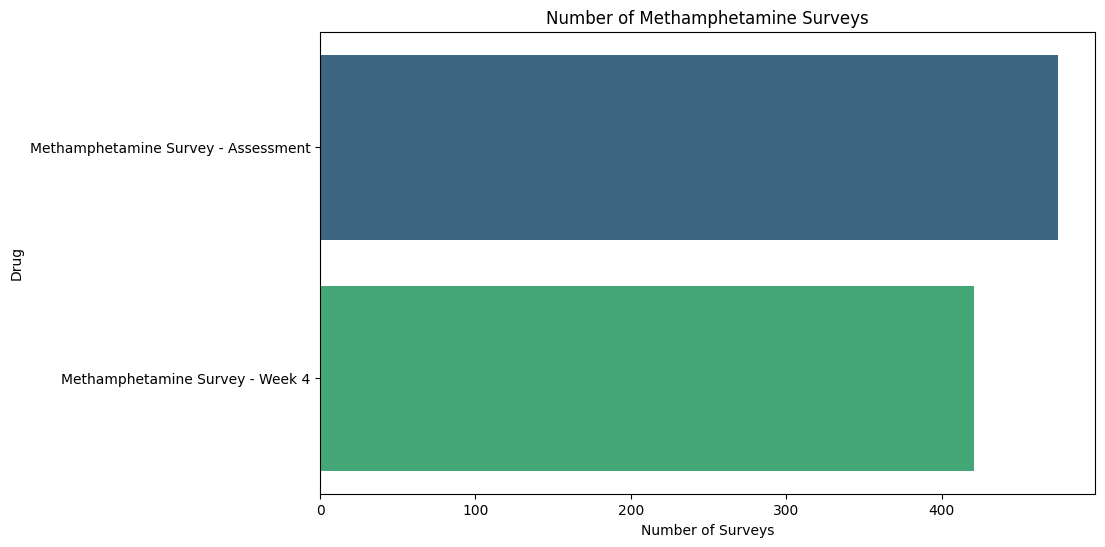

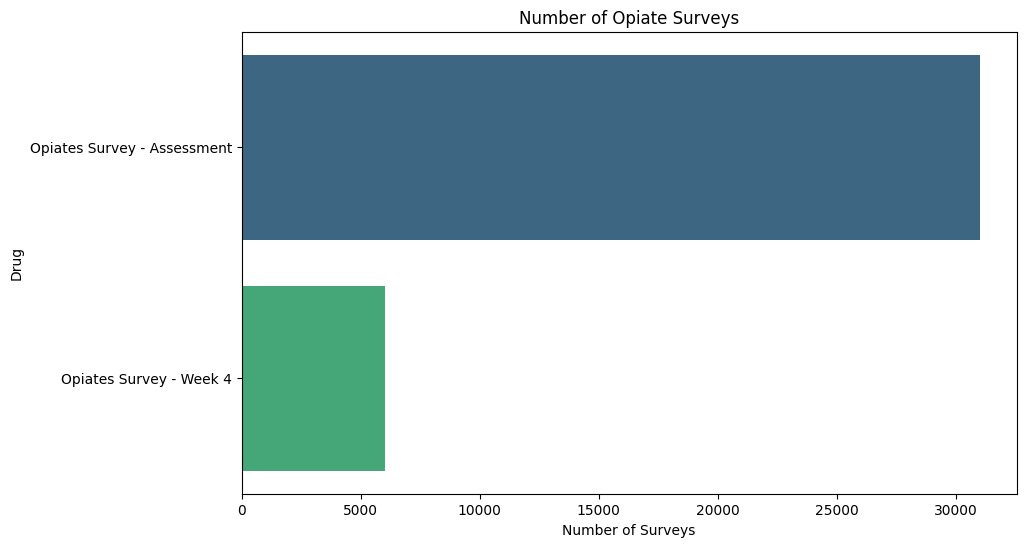

In [28]:
surveys = data[[col for col in data.columns if 'Survey' in col and 'Use' not in col]]

survey_list = ['Oxycodone','Cocaine','Methamphetamine','Opiate']


# create a df and separate barplot for each drug above
for survey in survey_list:
    survey_df = surveys[[col for col in surveys.columns if survey in col]]
    survey_df = survey_df.sum()
    plt.figure(figsize=(10,6))
    sns.barplot(x=survey_df.values, y=survey_df.index, palette='viridis')
    plt.title(f'Number of {survey} Surveys')
    plt.xlabel('Number of Surveys')
    plt.ylabel('Drug')
    plt.show()

In [33]:
data.columns.tolist()

['Oxycodone Test - Assessment',
 'Cocaine Test - Assessment',
 'Methamphetamine Test - Assessment',
 'Opiate 300 Test - Assessment',
 'Oxycodone Test - Week 1',
 'Cocaine Test - Week 1',
 'Methamphetamine Test - Week 1',
 'Opiate 300 Test - Week 1',
 'Oxycodone Test - Week 2',
 'Cocaine Test - Week 2',
 'Methamphetamine Test - Week 2',
 'Opiate 300 Test - Week 2',
 'Oxycodone Test - Week 3',
 'Cocaine Test - Week 3',
 'Methamphetamine Test - Week 3',
 'Opiate 300 Test - Week 3',
 'Oxycodone Test - Week 4',
 'Cocaine Test - Week 4',
 'Methamphetamine Test - Week 4',
 'Opiate 300 Test - Week 4',
 'Cocaine Survey - Assessment',
 'Oxycodone Survey - Assessment',
 'Methamphetamine Survey - Assessment',
 'Opiates Survey - Assessment',
 'Cocaine Survey - Week 4',
 'Oxycodone Survey - Week 4',
 'Methamphetamine Survey - Week 4',
 'Opiates Survey - Week 4',
 'Medication',
 'COWS - Pre-Dose Exam',
 'COWS - Post-Dose Exam',
 'Risk Behavior Survey - Sexual Activity',
 'Risk Behavior Survey - Cocai

In [37]:
data['COWS - Post-Dose Exam'].mean()

5.668242710795902

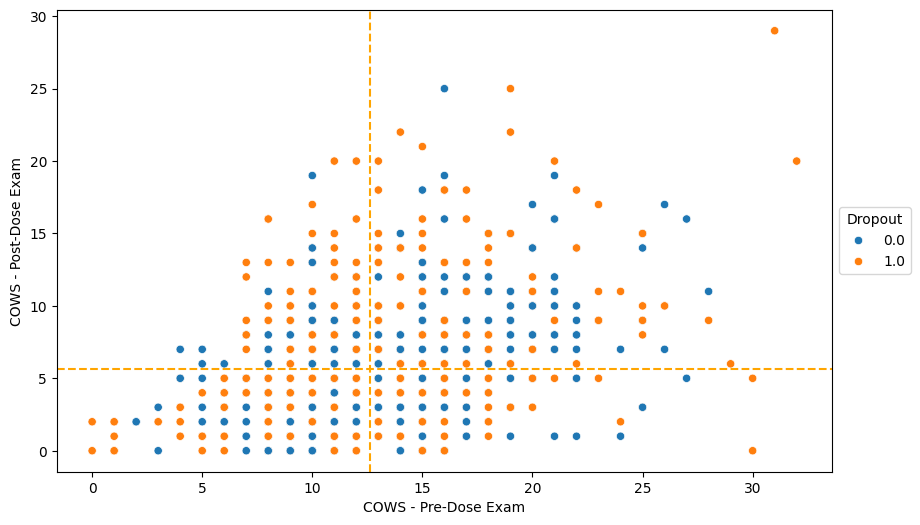

In [36]:
# scatter plot cows predose and postdose
plt.figure(figsize=(10,6))
sns.scatterplot(x='COWS - Pre-Dose Exam', y='COWS - Post-Dose Exam', data=data, hue='Dropout')
# move legend to outside plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Dropout')
plt.axhline(data['COWS - Post-Dose Exam'].mean(), color='orange', linestyle='--')
plt.axvline(data['COWS - Pre-Dose Exam'].mean(), color='orange', linestyle='--')


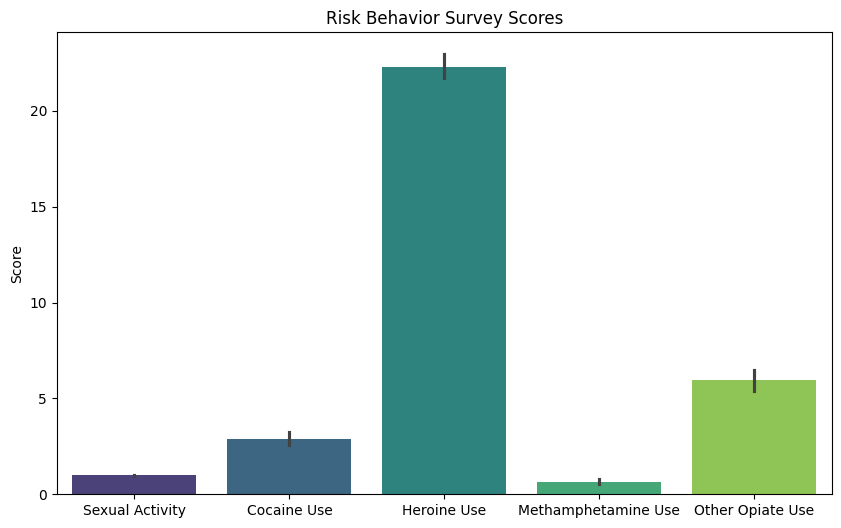

In [41]:
rbs = data[[col for col in data.columns if 'Risk' in col]]

# remove "Risk Behavior Survey -" from column names
rbs.columns = [re.sub('Risk Behavior Survey - ', '', col) for col in rbs.columns]

# create boxplot
plt.figure(figsize=(10,6))
sns.barplot(data=rbs, palette='viridis')
plt.title('Risk Behavior Survey Scores')
plt.ylabel('Score')
plt.show()

